In [1]:
import numpy as np

import wf_psf as wf

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as mtick
import seaborn as sns



In [2]:
def define_plot_style():
    # Define plot paramters
    # Use seaborn style
    sns.set()
    
    plot_style = {
        'figure.figsize': (12,8),
        'figure.dpi': 200,
        'figure.autolayout':True,
        'lines.linewidth': 2,
        'lines.linestyle': '-',
        'lines.marker': 'o',
        'lines.markersize': 10,
        'legend.fontsize': 20,
        'legend.loc': 'best',
        'axes.titlesize': 24,
        'font.size': 22
    }
    mpl.rcParams.update(plot_style)

saving_folder ='../figures/'

define_plot_style()
sns.set(font_scale=1.5)



In [3]:
metrics_file = '../wf-outputs/metrics/wfe_study_id009_bis/metrics-poly_wfe_study_id009_%s_bis_%s.npy'


# wf.script_utils.extract_shape_pix_results ->
#     model_polyc_shpix_rmse = res[0]
#     model_polyc_shpix_std_rmse = res[1]
#     model_polyc_shpix_rel_rmse = res[2]
#     model_polyc_shpix_std_rel_rmse = res[3]


In [4]:
# Extract full datasets
n_realisations = 9

dataset_list = [
    ('064',),
    ('128',),
    ('256',),
    ('256_benchmark',),
]

metrics_dict_list = []
pix_metrics_dict_list = []
opd_metrics_dict_list = []
for idx in range(1, n_realisations+1):   
    metrics_dict_list_ = wf.script_utils.extract_shape_pix_results(
        [np.load(metrics_file % (dataset+(str(idx),)), allow_pickle=True)[()] for dataset in dataset_list]
    )
    pix_metrics_dict_list_ = wf.script_utils.extract_poly_results(
        [np.load(metrics_file % (dataset+(str(idx),)), allow_pickle=True)[()] for dataset in dataset_list]
    )
    opd_metrics_dict_list_ = wf.script_utils.extract_opd_results(
        [np.load(metrics_file % (dataset+(str(idx),)), allow_pickle=True)[()] for dataset in dataset_list]
    )
    metrics_dict_list.append(metrics_dict_list_)
    pix_metrics_dict_list.append(pix_metrics_dict_list_)
    opd_metrics_dict_list.append(opd_metrics_dict_list_)
    
metrics_dict_list_np = np.array(metrics_dict_list)
pix_metrics_dict_list_np = np.array(pix_metrics_dict_list)
opd_metrics_dict_list_np = np.array(opd_metrics_dict_list)



In [5]:

metrics_mean = np.mean(metrics_dict_list_np,axis=0)
pix_metrics_mean = np.mean(pix_metrics_dict_list_np,axis=0)
opd_metrics_mean = np.mean(opd_metrics_dict_list_np,axis=0)

metrics_median = np.median(metrics_dict_list_np,axis=0)
pix_metrics_median = np.median(pix_metrics_dict_list_np,axis=0)
opd_metrics_median = np.median(opd_metrics_dict_list_np,axis=0)

metrics_std = np.std(metrics_dict_list_np,axis=0)
pix_metrics_std = np.std(pix_metrics_dict_list_np,axis=0)
opd_metrics_std = np.std(opd_metrics_dict_list_np,axis=0)

metrics_best = np.min(metrics_dict_list_np,axis=0)
pix_metrics_best = np.min(pix_metrics_dict_list_np,axis=0)
opd_metrics_best = np.min(opd_metrics_dict_list_np,axis=0)



In [7]:

SR_data = np.load(saving_folder+'result_dict_id009_total_reps.npy',allow_pickle=True)[()]

SR_data


{'model_064_rel_rmse': array([5.08705677, 5.61449862, 5.08701694, 3.54040342, 5.73725727,
        5.68484656, 4.38561155, 5.27863165, 3.51873333]),
 'model_064_std_rel_rmse': array([2.61616571, 1.87823922, 2.46136524, 1.62178299, 1.89059537,
        2.06433733, 2.30615094, 1.96449952, 1.60309463]),
 'model_128_rel_rmse': array([1.14195661, 4.01311825, 2.97478546, 2.65130685, 2.86941983,
        2.71096396, 3.93740918, 4.30978019, 1.63257378]),
 'model_128_std_rel_rmse': array([0.37159136, 1.62235134, 3.17561218, 0.77001497, 1.78601803,
        1.04034929, 2.27665594, 1.86949049, 0.53014815]),
 'model_256_rel_rmse': array([2.62705269, 2.23776978, 4.27448855, 2.58015316, 1.04575128,
        3.15205333, 3.49616721, 1.66190468, 4.36528636]),
 'model_256_std_rel_rmse': array([0.98672247, 0.68250382, 2.72047781, 0.87204603, 0.35602997,
        2.33784353, 2.00473024, 0.4836183 , 1.68170574]),
 'model_256_benchmark_rel_rmse': array([1.31415853, 2.97896004, 4.22073245, 3.6112005 , 3.38505149,


In [9]:

SR_metrics = np.array([
    SR_data['model_064_rel_rmse'],
    SR_data['model_128_rel_rmse'],
    SR_data['model_256_rel_rmse'],
])


SR_metrics_mean = np.mean(SR_metrics, axis=1)
SR_metrics_median = np.median(SR_metrics, axis=1)
SR_metrics_std = np.std(SR_metrics, axis=1)
SR_metrics_best = np.min(SR_metrics, axis=1)




In [39]:
print(SR_data['model_256_rel_rmse'])

print(SR_data['model_256_benchmark_rel_rmse'])

print(metrics_dict_list_np[:,2,3])

[2.62705269 2.23776978 4.27448855 2.58015316 1.04575128 3.15205333
 3.49616721 1.66190468 4.36528636]
[1.31415853 2.97896004 4.22073245 3.6112005  3.38505149 2.53949112
 3.27744412 5.17432608 2.34715643]
[1.34543134 2.94336006 4.15410027 3.58859189 3.40030752 2.38236375
 3.30792479 5.11677414 2.28912085]


# Compute computing times

In [13]:

# Log files path
log_files_path = '../wf-outputs/log-files/wfe_study_id009_bis/poly_wfe_study_id009_%s_bis_%s_output.log'



In [14]:

times_list = []
# Load computing times
for idx in range(1, n_realisations+1):
    
    times_list.append([
        float(open(log_files_path % (dataset+(str(idx),)) ).readlines()[-3][20:-1])
        for dataset in dataset_list
    ])

times_list_np = np.array(times_list)


In [15]:
times_list_np.shape

(9, 4)

In [16]:
# Convert from sec to hours
times_mean = np.mean(times_list_np, axis=0) / 3600.
times_median = np.median(times_list_np, axis=0) / 3600.
times_std = np.std(times_list_np, axis=0) / 3600.
times_best = np.min(times_list_np, axis=0) / 3600.


# Summary of results

In [17]:
print(metrics_mean.shape)
print(metrics_median.shape)
print(metrics_std.shape)
print(metrics_best.shape)

print(pix_metrics_mean.shape)
print(pix_metrics_median.shape)
print(pix_metrics_std.shape)
print(pix_metrics_best.shape)

print(opd_metrics_mean.shape)
print(opd_metrics_median.shape)
print(opd_metrics_std.shape)
print(opd_metrics_best.shape)

# Dimensions (a,b)
# a -> (rmse, std_rmse , rel_rmse , std_rel_rmse)
# b -> datasets


(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)


In [19]:
print('Relative pixel RMSE')
print('Mean: \t', pix_metrics_mean[2,:])
print('Median: ', pix_metrics_median[2,:])
print('Std dev:', pix_metrics_std[2,:])
print('Best: \t', pix_metrics_best[2,:])
print(''),print('')
print('Relative SR pixel RMSE: benchmark 256')
print('Mean: \t', metrics_mean[2,-1])
print('Median: ', metrics_median[2,-1])
print('Std dev:', metrics_std[2,-1])
print('Best: \t', metrics_best[2,-1])
print(''),print('')
print('Relative SR pixel RMSE: 64, 128, 256')
print('Mean: \t', SR_metrics_mean)
print('Median: ', SR_metrics_median)
print('Std dev:', SR_metrics_std)
print('Best: \t', SR_metrics_best)
print(''),print('')
print('Relative WFE RMSE')
print('Mean: \t', opd_metrics_mean[2,:])
print('Median: ', opd_metrics_median[2,:])
print('Std dev:', opd_metrics_std[2,:])
print('Best: \t', opd_metrics_best[2,:])
print(''),print('')
print('Computing times [hours]')
print('Mean: \t', times_mean)
print('Median: ', times_median)
print('Std dev:', times_std)
print('Best: \t', times_best)

print(''),print('')
print('Datasets: ', dataset_list)


Relative pixel RMSE
Mean: 	 [3.3203036  1.78077787 1.18582837 1.1652141 ]
Median:  [3.32859419 1.78806558 1.18876835 1.19292783]
Std dev: [0.05154972 0.12669154 0.14084571 0.14989289]
Best: 	 [3.20837274 1.54730985 0.94233612 0.85084531]


Relative SR pixel RMSE: benchmark 256
Mean: 	 3.1697749574151306
Median:  3.3079247921705246
Std dev: 1.042561045761697
Best: 	 1.3454313389956951


Relative SR pixel RMSE: 64, 128, 256
Mean: 	 [4.88156179 2.91570157 2.82673634]
Median:  [5.08705677 2.86941983 2.62705269]
Std dev: [0.82048467 1.00563457 1.05374414]
Best: 	 [3.51873333 1.14195661 1.04575128]


Relative WFE RMSE
Mean: 	 [154.32579464 167.34554085 182.66809536 180.90117637]
Median:  [142.94843774 180.23440664 195.14211533 178.38507019]
Std dev: [20.41278924 33.43979763 29.59986502 30.75031482]
Best: 	 [130.20987082 105.33067178 121.17282201 126.83565069]


Computing times [hours]
Mean: 	 [ 5.90220182  7.48464841  8.88028306 10.17409319]
Median:  [5.43401858 6.93058509 8.68389589 9.45363

# Errors between the 256 and 4096 datasets

In [21]:

# Absolute RMSE:	 3.8303e-05 	 +/- 7.4604e-06
# Relative RMSE:	 5.1611e-01 % 	 +/- 1.1823e-01 %
    
dataset_error_x1 = 0.51611 # Relative

# Absolute RMSE:	 9.3197e-06 	 +/- 1.6003e-06
# Relative RMSE:	 6.1254e-01 % 	 +/- 1.0338e-01 %

dataset_error_x3 = 0.61254 # Relative


# Plots

In [22]:
wfe_res = np.array([64, 128, 256])


# Relative SR (res x3) pixel RMSE & Computing time vs WFE res

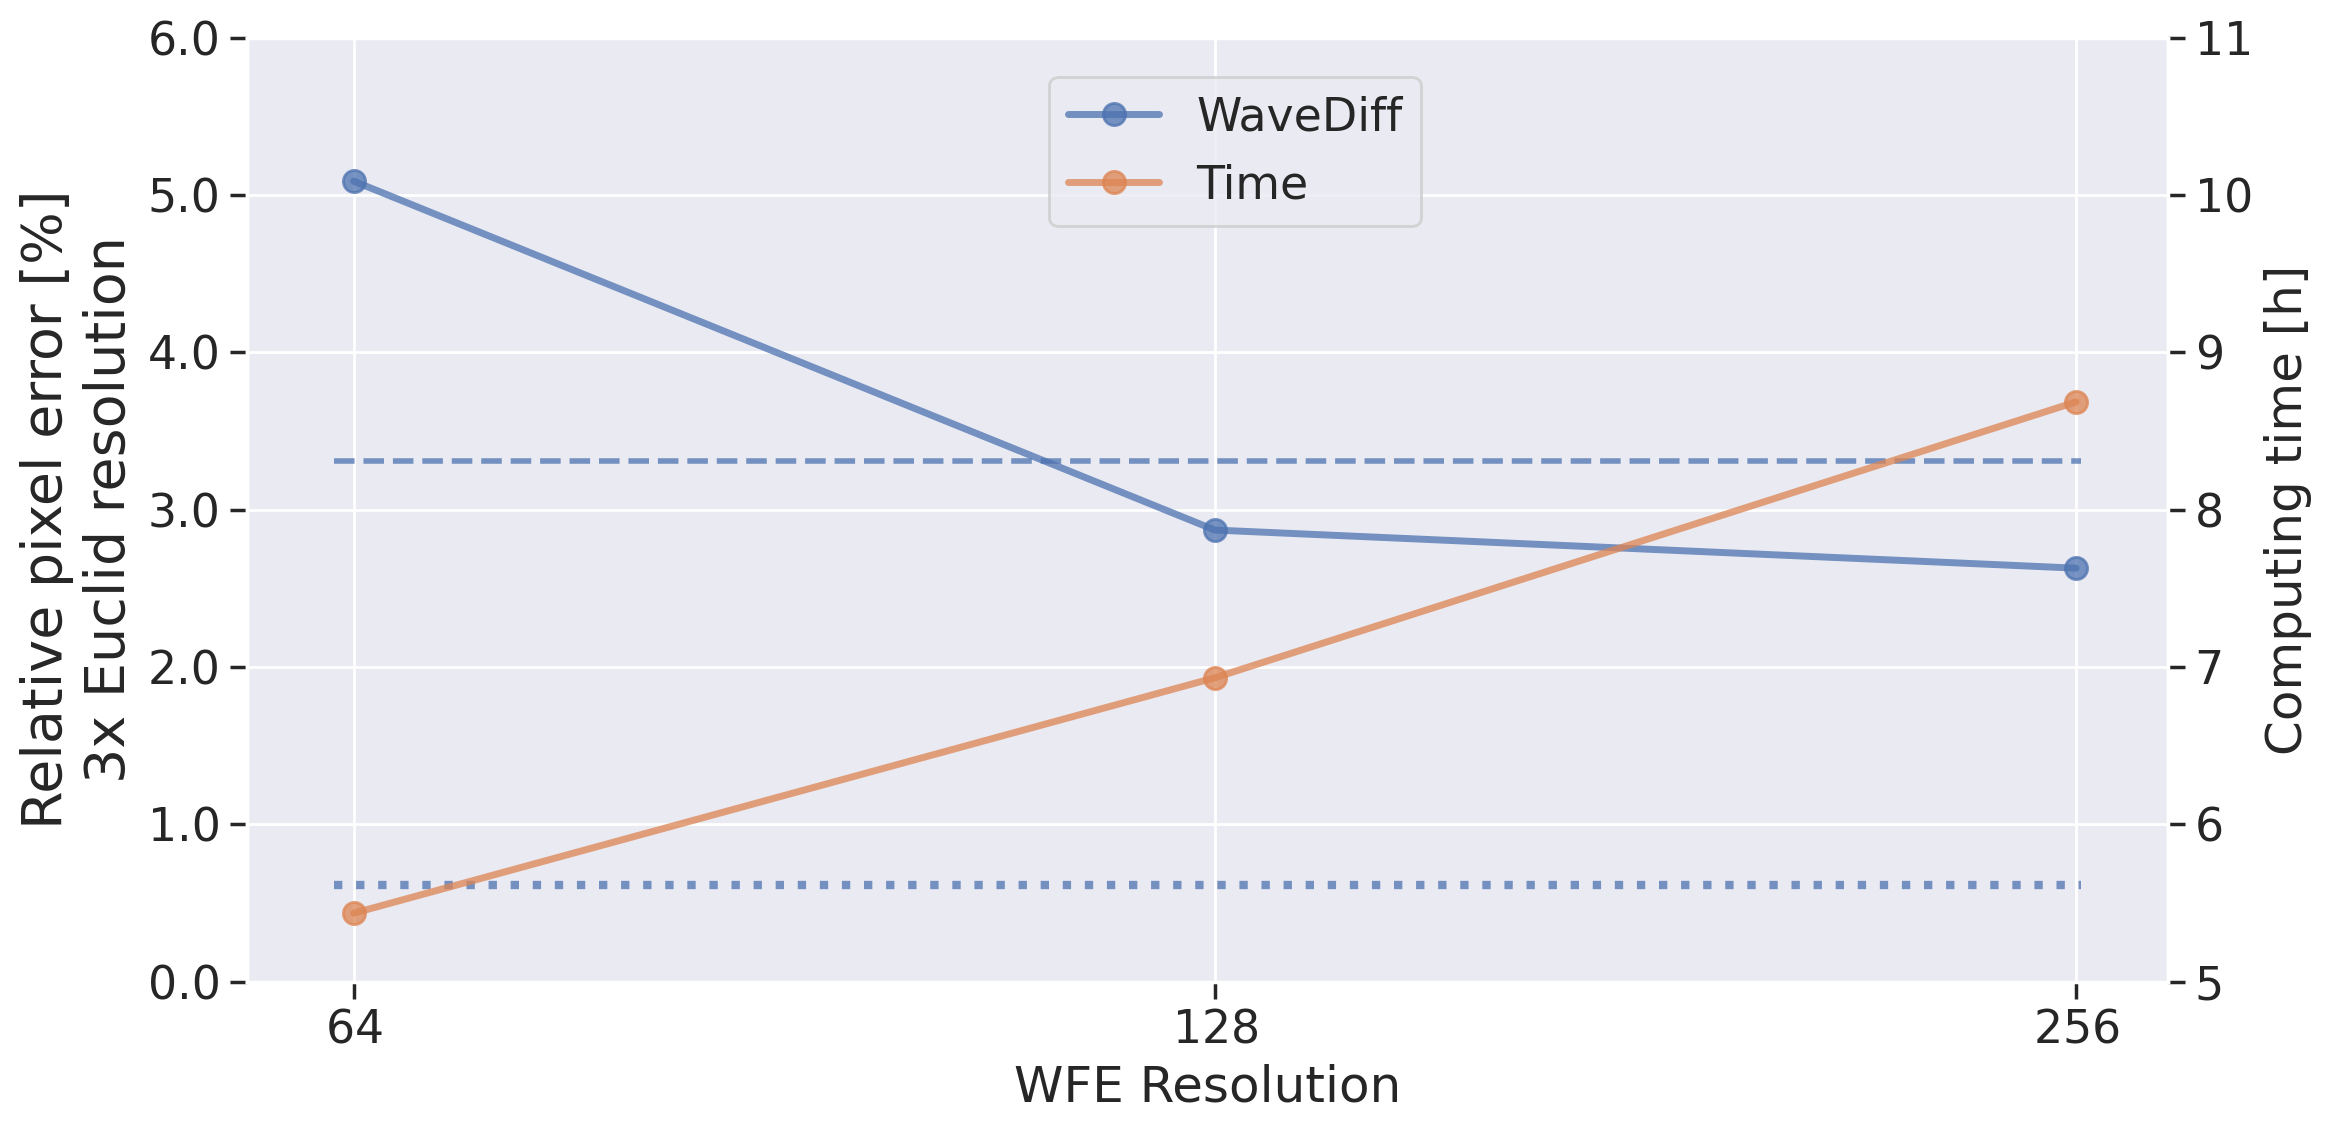

In [43]:

# Define style
define_plot_style()
sns.set(font_scale=1.5)

kwargs = dict(linewidth=2.5, alpha=0.75, markersize=8)

fig, ax1 = plt.subplots(figsize=(12, 6),facecolor='white')

# fig.suptitle('PSF relative errors @ 3x Euclid resolution - Training time')
    

ax1.set_xlabel('WFE Resolution')
ax1.set_ylabel('Relative pixel error [%]\n3x Euclid resolution', fontsize = 20) 

# ax1.plot(wfe_res, metrics_mean[2,:-1], color=sns.color_palette()[0], label='Error', **kwargs)
# ax1.hlines(metrics_mean[2,-1], xmin=63, xmax=257, colors=sns.color_palette()[0], linestyles='dashed', linewidth=2, label='', alpha=0.75)

ax1.plot(wfe_res, SR_metrics_median, color=sns.color_palette()[0], label='WaveDiff', **kwargs)
ax1.hlines(metrics_median[2,-1], xmin=63, xmax=257, colors=sns.color_palette()[0], linestyles='dashed', linewidth=2, label='', alpha=0.75)
ax1.hlines(dataset_error_x3, xmin=63, xmax=257, colors=sns.color_palette()[0], linestyles='dotted', linewidth=3, label='', alpha=0.75)


ax1.tick_params(axis='y')
ax1.set_ylim((0,6))
ax1.yaxis.set_major_locator(mpl.ticker.LinearLocator(7))
ax1.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.1f'))

ax1.set_xscale('log', base=2) # Important to leave the base=2
plt.xticks([64,128,256])
ax1.get_xaxis().set_major_formatter(mtick.ScalarFormatter())


ax1.get_xaxis().set_tick_params(which='minor', size=0)
ax1.get_xaxis().set_tick_params(which='minor', width=0) 

ax1.spines['bottom'].set_visible(False)
ax1.spines['top'].set_visible(False)

ax1.xaxis.tick_bottom()
ax1.xaxis.major.formatter._useMathText = True


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('Computing time [h]')  # we already handled the x-label with ax1
# ax2.plot(wfe_res, times_mean[:-1], color=sns.color_palette()[1], label='Time', **kwargs)
ax2.plot(wfe_res, times_median[:-1], color=sns.color_palette()[1], label='Time', **kwargs)
ax2.tick_params(axis='y') 
ax2.grid(None)
ax2.set_ylim((5,11))
ax2.yaxis.set_major_locator(mpl.ticker.LinearLocator(7))


fig.tight_layout()  # otherwise the right y-label is slightly clipped

fig.legend(loc=(0.45,0.8))

# plt.savefig('../figures/wfe-study_id009_resx3_error-and-time_vs_wfe-res_mean.pdf')
# plt.savefig('../figures/wfe-study_id009_resx3_error-and-time_median_with_benchmark.pdf')
# plt.savefig('../figures/wfe-study_id009_resx3_error-and-time_median.pdf')

plt.show()




# Relative (res x1) pixel RMSE & Computing time vs WFE res

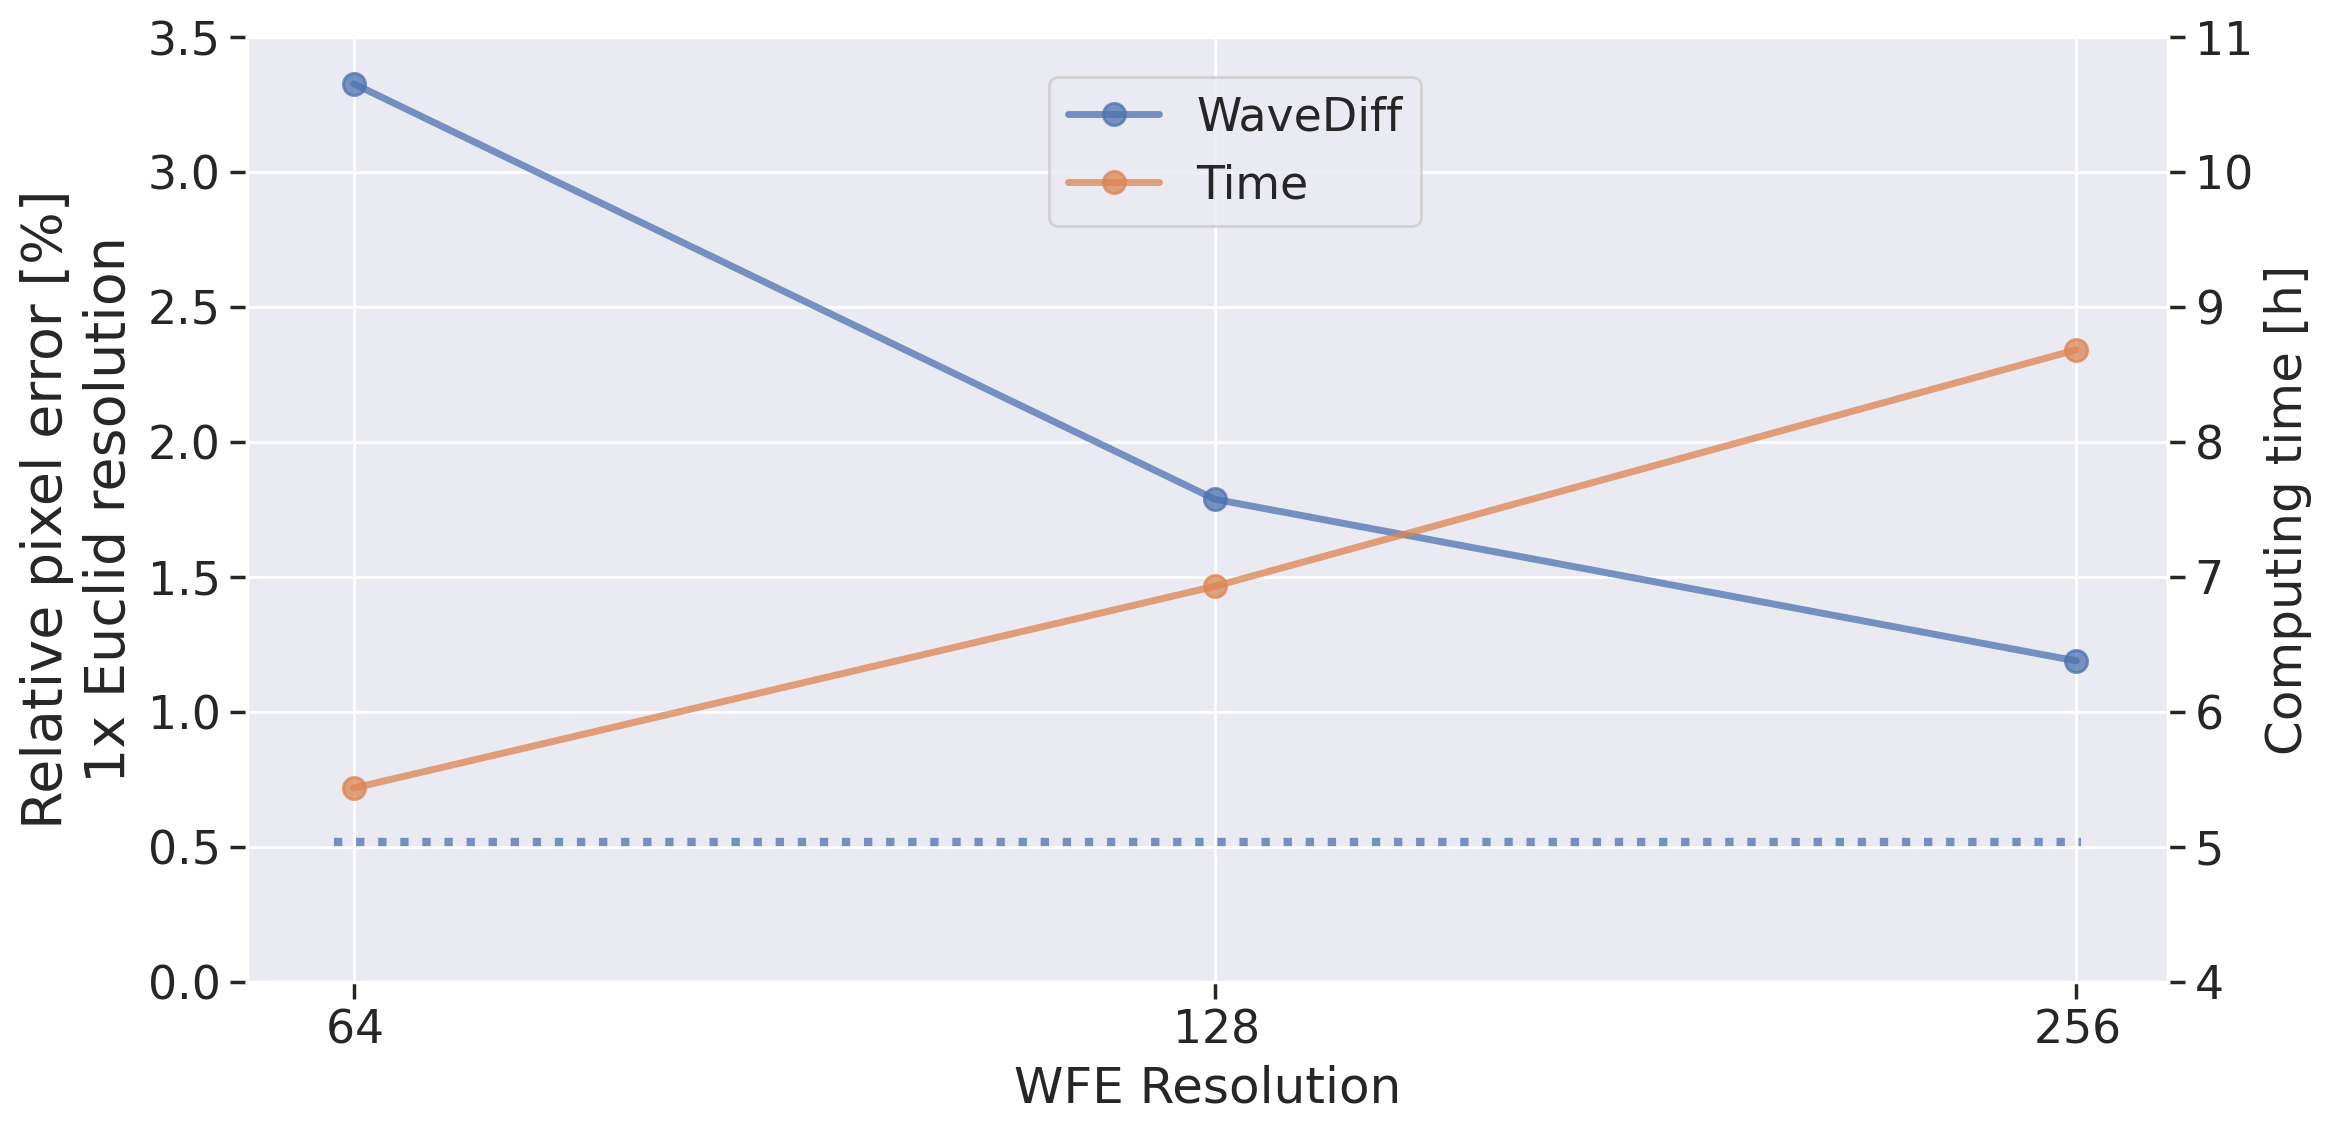

In [45]:
# Define style
define_plot_style()
sns.set(font_scale=1.5)

kwargs = dict(linewidth=2.5, alpha=0.75, markersize=8)

fig, ax1 = plt.subplots(figsize=(12, 6),facecolor='white')

# fig.suptitle('PSF relative errors @ 3x Euclid resolution - Training time')
    

ax1.set_xlabel('WFE Resolution')
ax1.set_ylabel('Relative pixel error [%]\n1x Euclid resolution', fontsize = 20) 

# ax1.plot(wfe_res, pix_metrics_mean[2,:-1], color=sns.color_palette()[0], label='WaveDiff', **kwargs)
# ax1.hlines(pix_metrics_mean[2,-1], xmin=63, xmax=257, colors=sns.color_palette()[0], linestyles='dashed', linewidth=2, label='', alpha=0.75)
# ax1.hlines(dataset_error_x1, xmin=63, xmax=257, colors=sns.color_palette()[0], linestyles='dotted', linewidth=2, label='', alpha=0.75)


ax1.plot(wfe_res, pix_metrics_median[2,:-1], color=sns.color_palette()[0], label='WaveDiff', **kwargs)
# ax1.hlines(pix_metrics_median[2,-1], xmin=63, xmax=257, colors=sns.color_palette()[0], linestyles='dashed', linewidth=2, label='', alpha=0.75)
ax1.hlines(dataset_error_x1, xmin=63, xmax=257, colors=sns.color_palette()[0], linestyles='dotted', linewidth=3, label='', alpha=0.75)


ax1.tick_params(axis='y')
ax1.set_ylim((0,3.5))
ax1.yaxis.set_major_locator(mpl.ticker.LinearLocator(8))
ax1.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.1f'))

ax1.set_xscale('log', base=2) # Important to leave the base=2
plt.xticks([64,128,256])
ax1.get_xaxis().set_major_formatter(mtick.ScalarFormatter())


ax1.get_xaxis().set_tick_params(which='minor', size=0)
ax1.get_xaxis().set_tick_params(which='minor', width=0) 

ax1.spines['bottom'].set_visible(False)
ax1.spines['top'].set_visible(False)

ax1.xaxis.tick_bottom()
ax1.xaxis.major.formatter._useMathText = True


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('Computing time [h]')  # we already handled the x-label with ax1
# ax2.plot(wfe_res, times_mean[:-1], color=sns.color_palette()[1], label='Time', **kwargs)
ax2.plot(wfe_res, times_median[:-1], color=sns.color_palette()[1], label='Time', **kwargs)
ax2.tick_params(axis='y') 
ax2.grid(None)
ax2.set_ylim((4,11))
ax2.yaxis.set_major_locator(mpl.ticker.LinearLocator(8))


fig.tight_layout()  # otherwise the right y-label is slightly clipped

fig.legend(loc=(0.45,0.8))

# plt.savefig('../figures/wfe-study_id009_resx1_error-and-time_vs_wfe-res_mean.pdf')
# plt.savefig('../figures/wfe-study_id009_resx1_error-and-time_median_with_benchmark.pdf')
plt.savefig('../figures/wfe-study_id009_resx1_error-and-time_median.pdf')

plt.show()
